In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('diabetes_012_health_indicators_BRFSS2021.csv')




In [ ]:
#Preprocess the data.

print(data.head())  # View the first few rows
print('------------------------------Info----------------------------------')
print(data.info())  # Get summary statistics like data types and missing values
print('------------------------------describe----------------------------------')
print(data.describe())  # Descriptive statistics for numerical columns
print('--------------------------------------------------------------------')





   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0       0       1.0          1  15.0     1.0     0.0   
1           2.0       1       0.0          1  28.0     0.0     0.0   
2           2.0       1       1.0          1  33.0     0.0     0.0   
3           2.0       0       1.0          1  29.0     0.0     1.0   
4           0.0       0       0.0          1  24.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0             0       1  ...              1   
1                   1.0             0       1  ...              1   
2                   0.0             1       1  ...              1   
3                   1.0             1       1  ...              1   
4                   0.0             0       0  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0          0.0      5.0      10.0      20.0       0.0    0   11        4.0   
1       

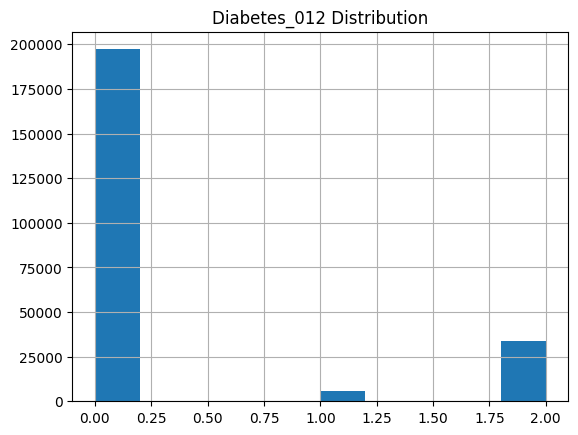

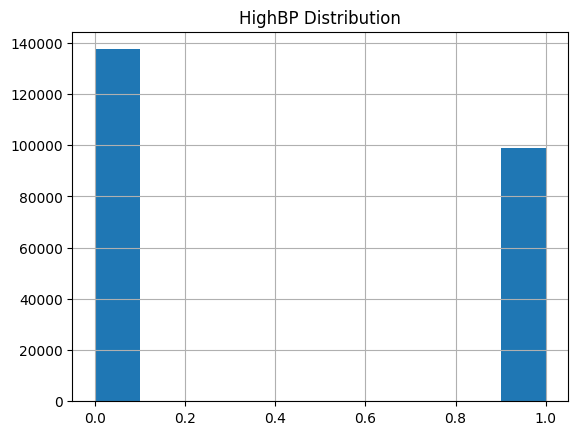

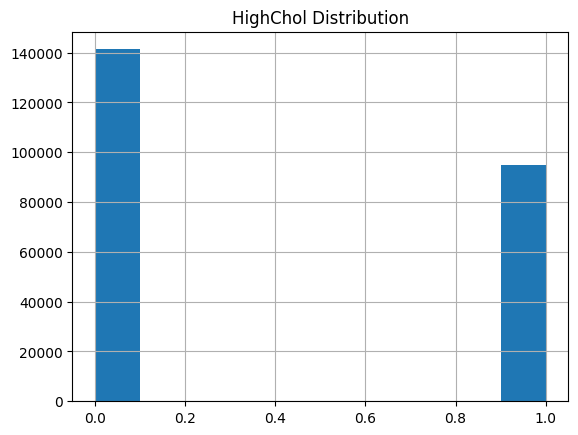

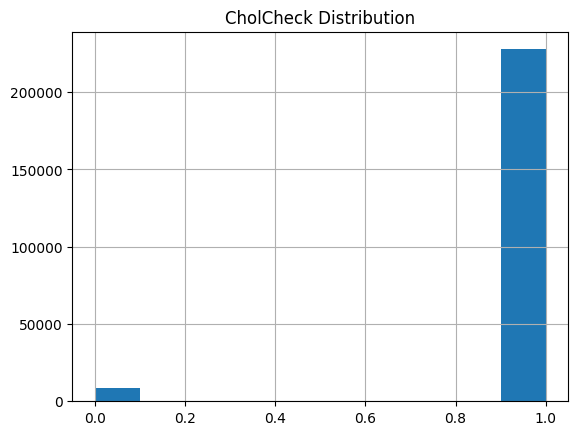

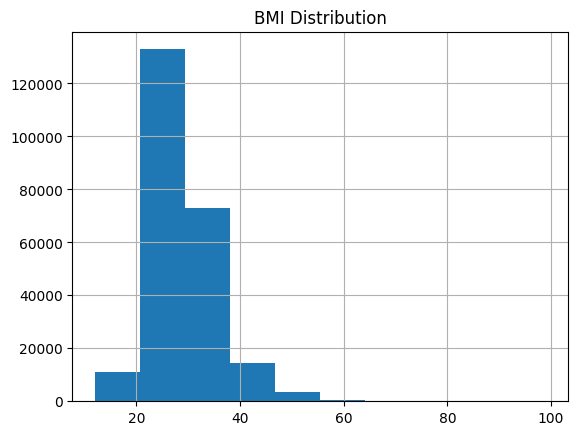

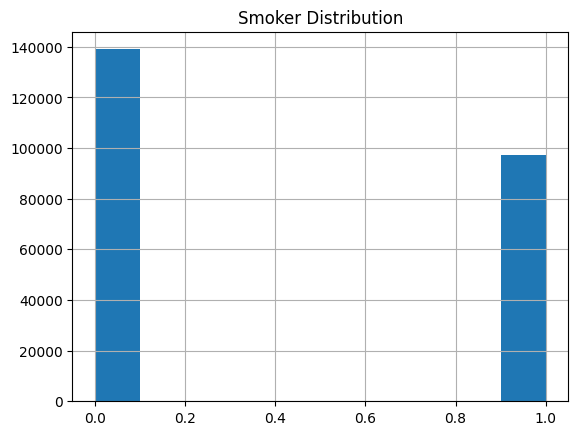

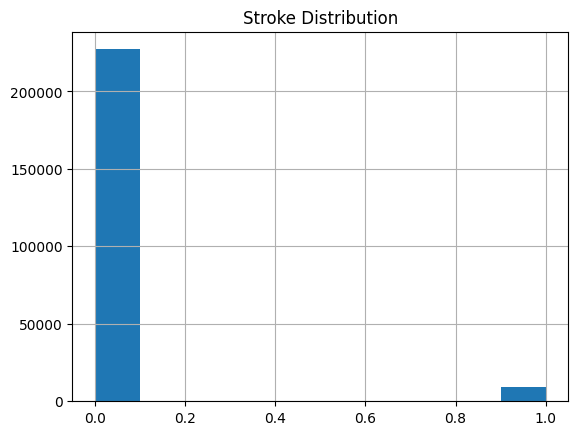

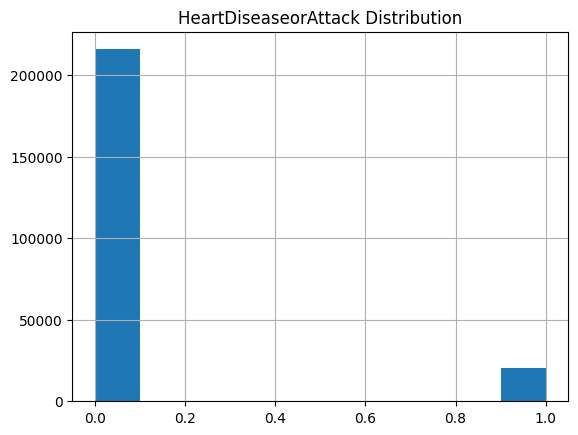

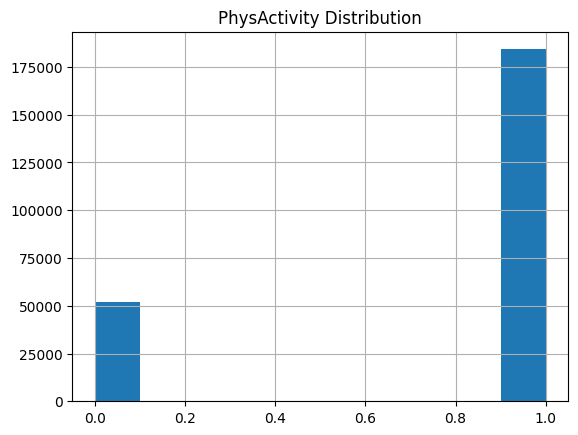

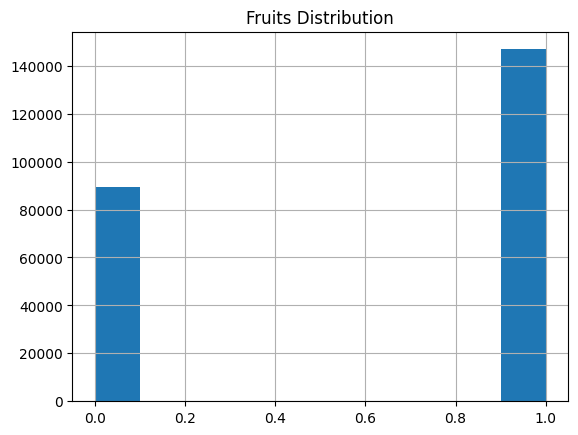

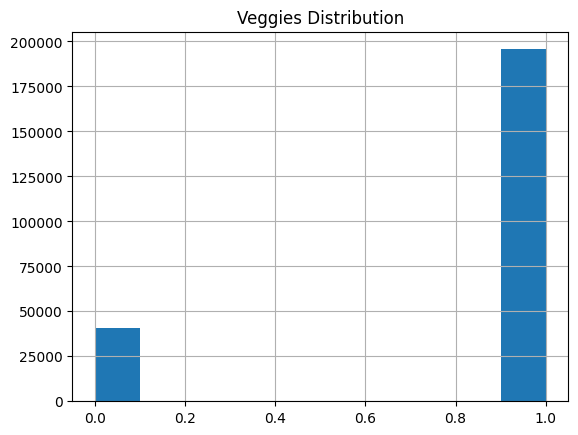

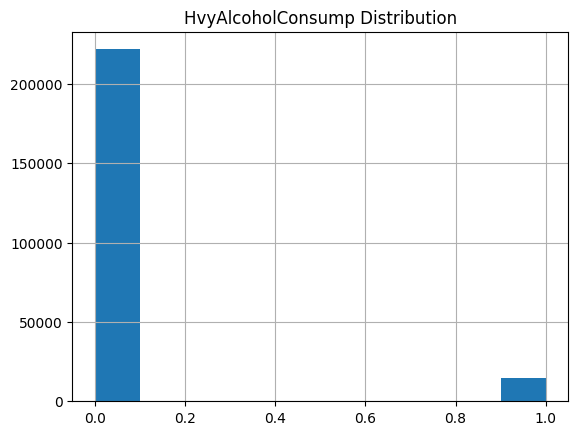

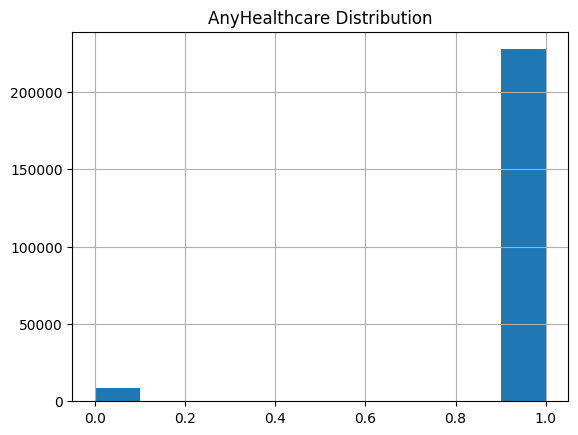

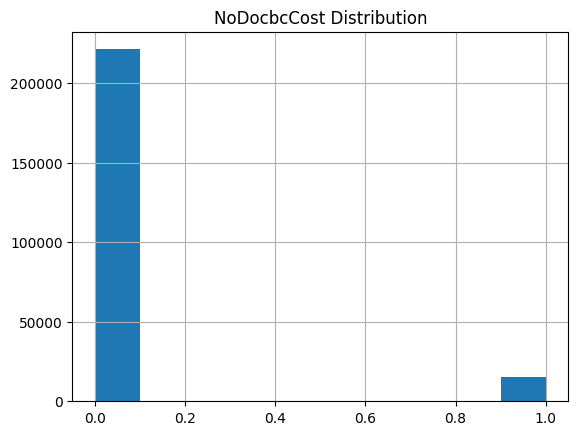

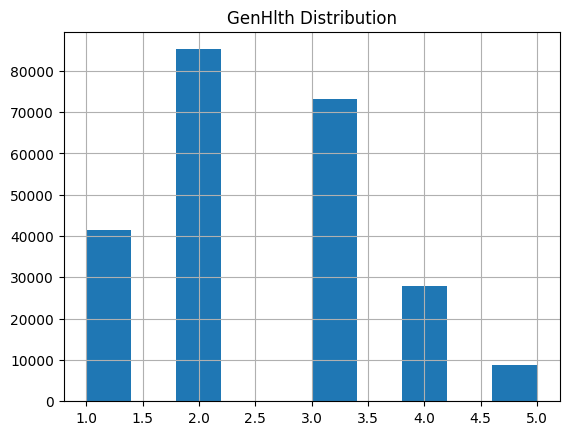

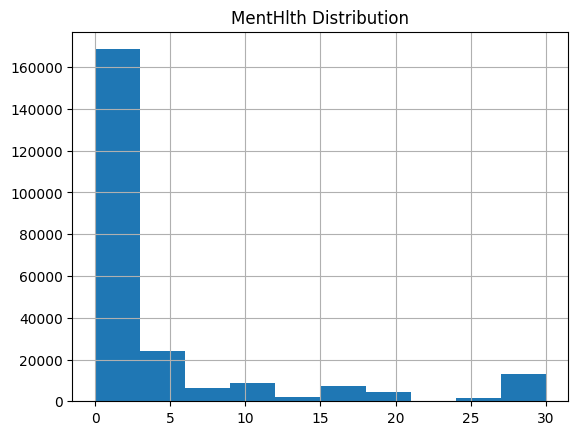

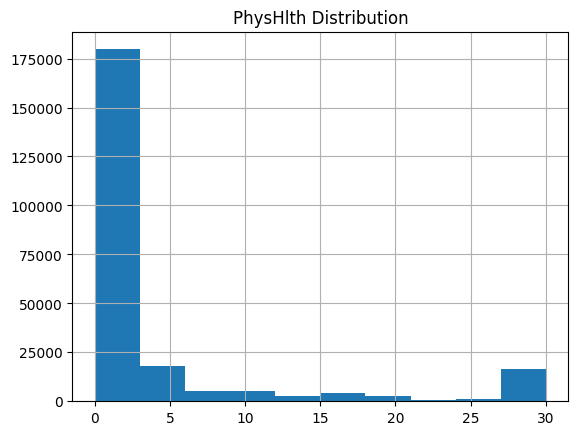

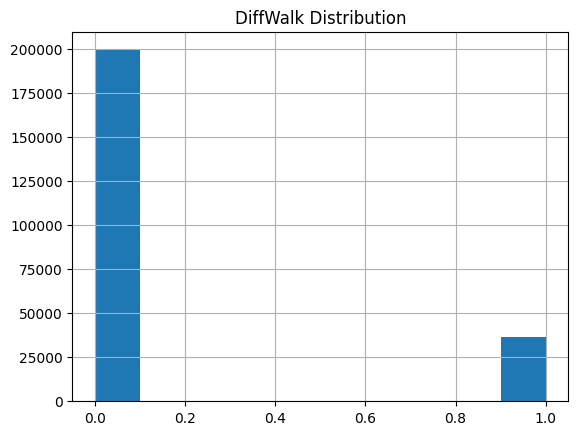

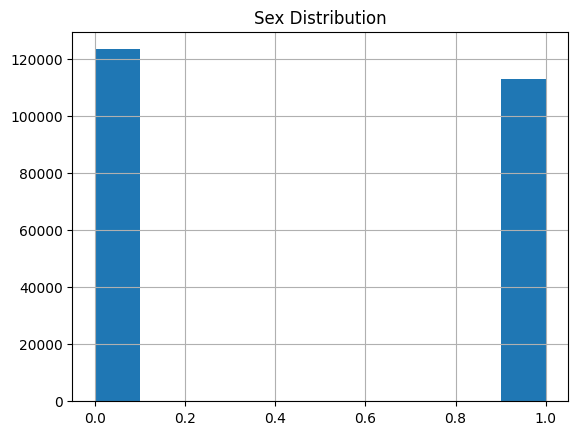

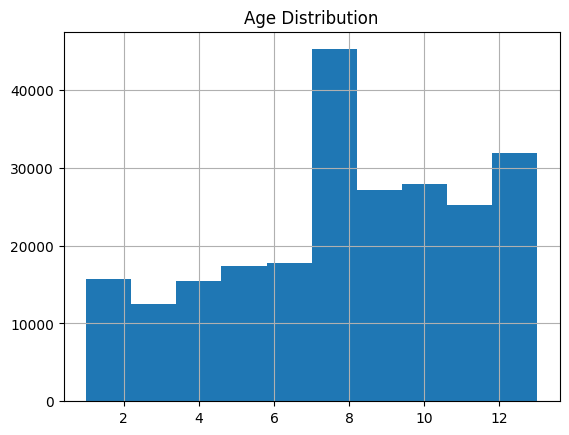

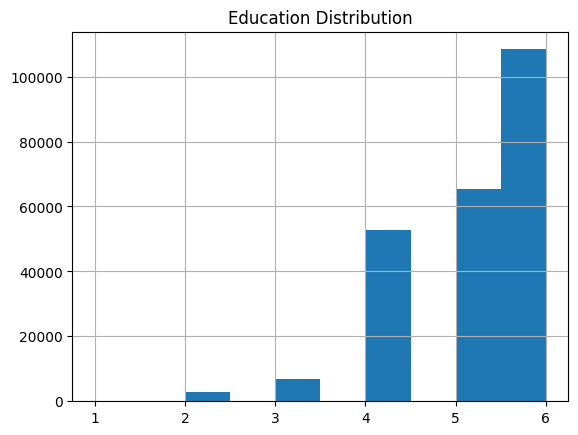

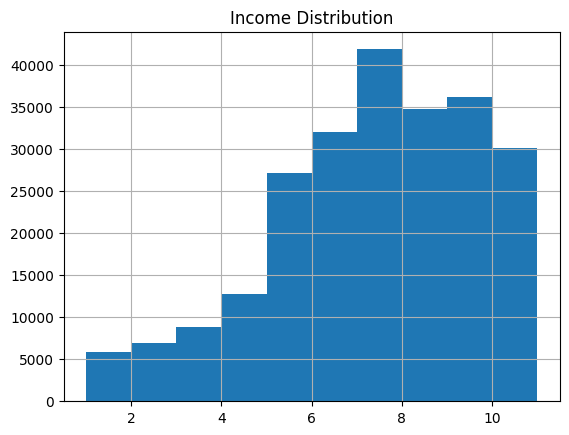

In [ ]:
#Plot a detailed respective graph for each column.


for col in data.columns:
      if data[col].dtype == object:  # Categorical
              data[col].value_counts().plot(kind="bar")

              plt.title(col + " Distribution")
              plt.show()
      else:  # Numerical
              data[col].hist()
              plt.title(col + " Distribution")
              plt.show()

In [ ]:
#Data Exploration and Preprocessing:

#Missing Values:
# View number of missing values per column
print(data.isnull().sum())

# Imputation strategy
data["diabetes"] = data["Diabetes_012"].fillna(data["Diabetes_012"].mean())

# Or, delete rows with missing values
data.dropna(inplace=True)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


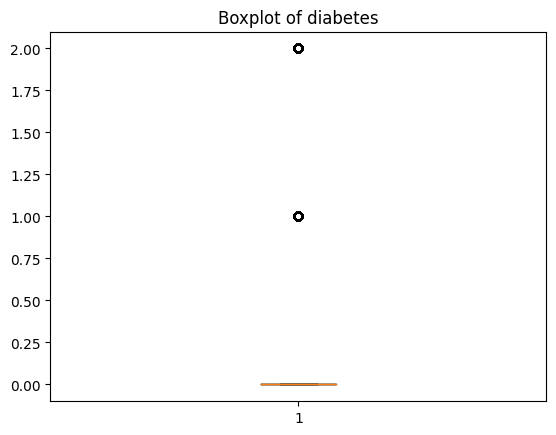

In [ ]:
#Outliers:


# Identify outliers using IQR method
Q1 = data["diabetes"].quantile(0.25)
Q3 = data["diabetes"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = data[(data["diabetes"] < lower_bound) | (data["diabetes"] > upper_bound)]

# Visualize outliers
plt.boxplot(data["diabetes"])
plt.title(f"Boxplot of {data['diabetes'].name}")
plt.show()

# Decide how to handle outliers
data = data.clip(lower=lower_bound, upper=upper_bound, inplace=False)


In [ ]:
#Categorical Encoding:

# One-hot encoding
print(data.columns)

if "diabetes" in data.columns:
      data = pd.get_dummies(data, columns=["diabetes"])

      # Label encoding
      from sklearn.preprocessing import LabelEncoder
      le = LabelEncoder()
      if "diabetes" in data.columns:
          data["diabetes"] = le.fit_transform(data["diabetes"])


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'diabetes'],
      dtype='object')


In [ ]:
#Normalization/Scaling:



from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler (normalize to mean 0 and standard deviation 1)
scaler = StandardScaler()
numerical_columns = ['Age', 'Sex', 'Income', 'Diabetes_012']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# MinMaxScaler (scale to range 0-1)
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])



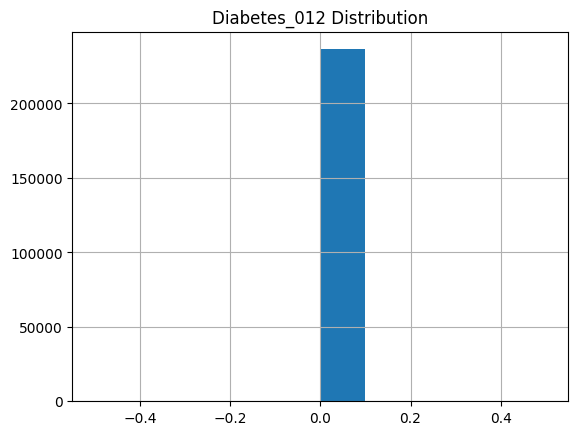

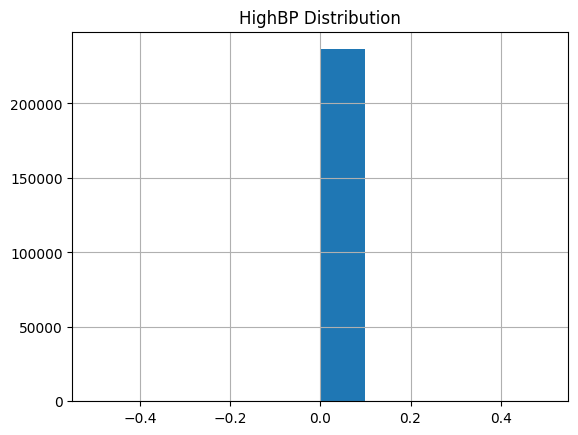

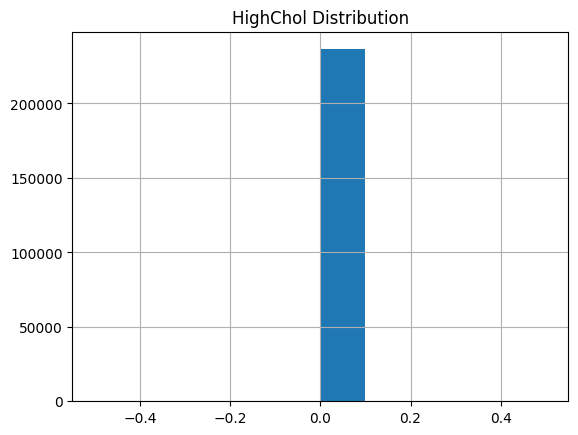

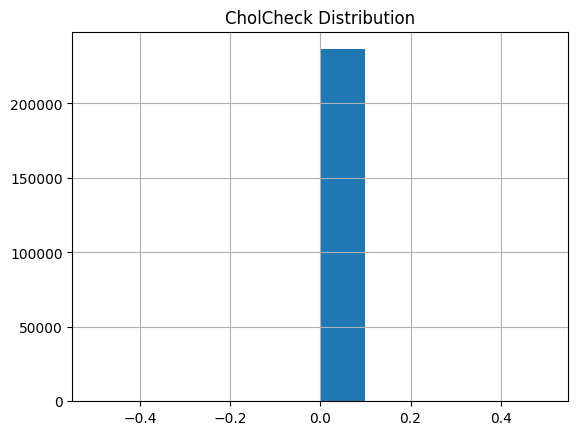

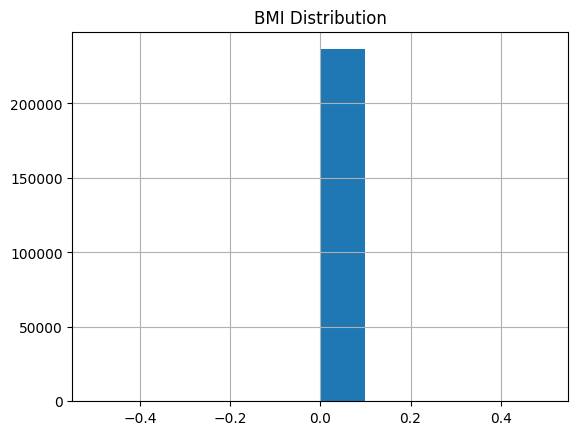

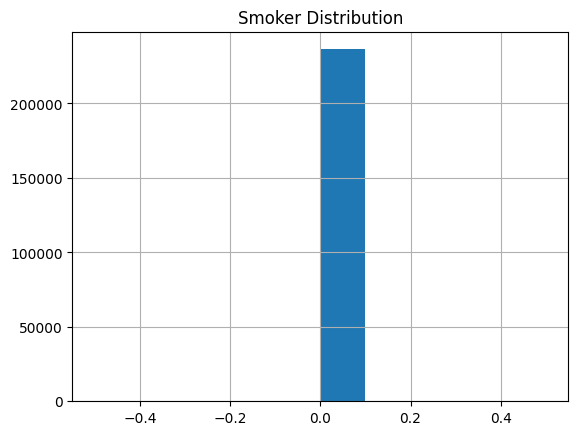

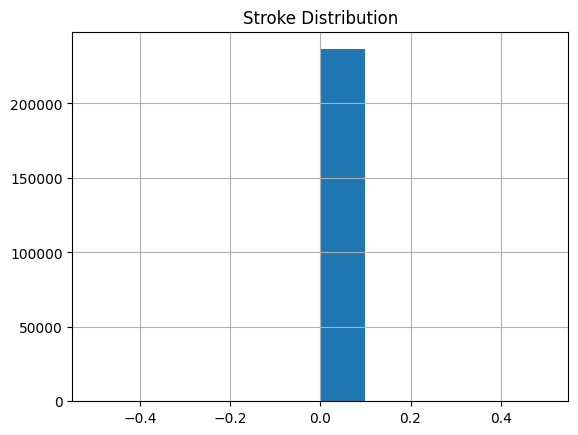

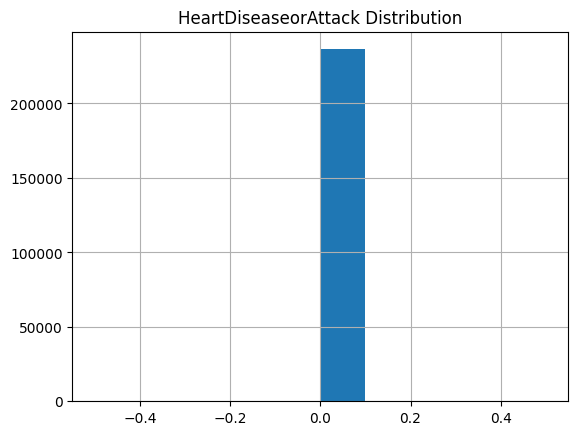

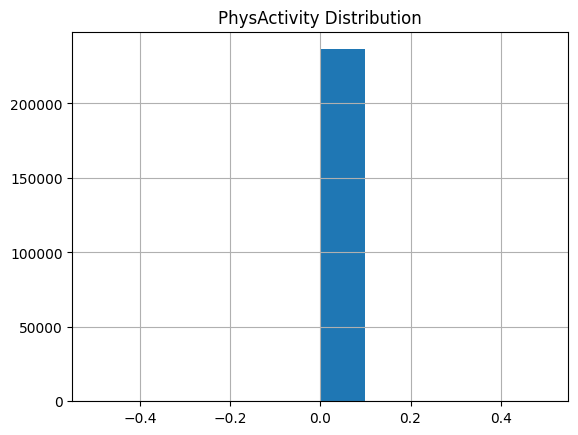

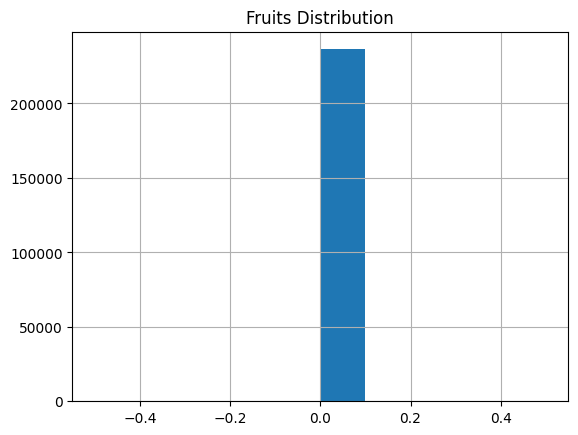

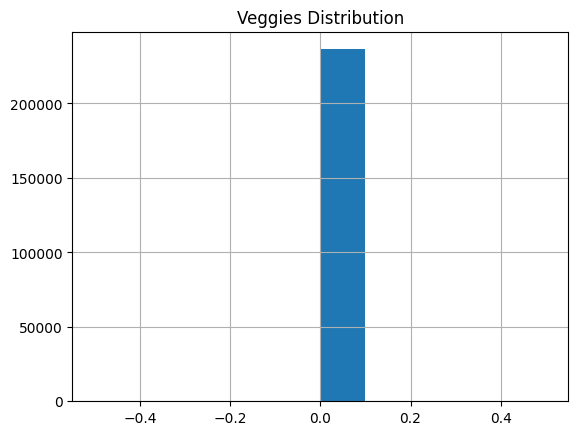

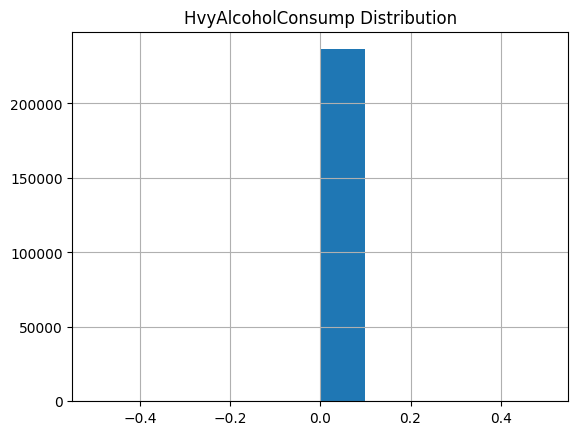

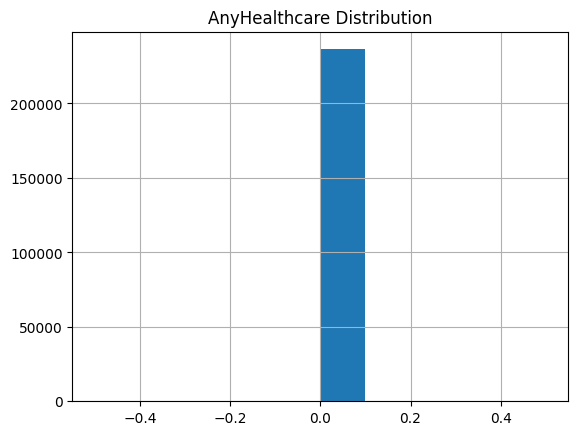

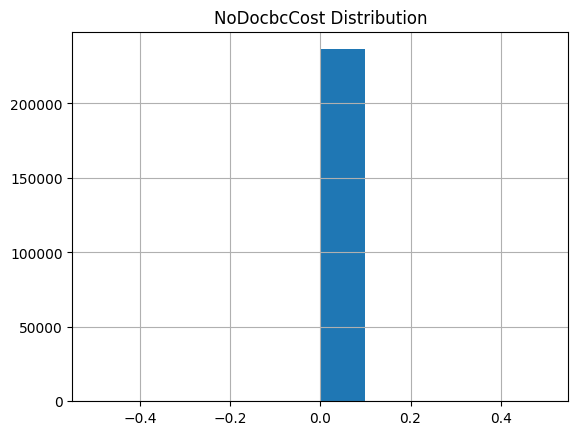

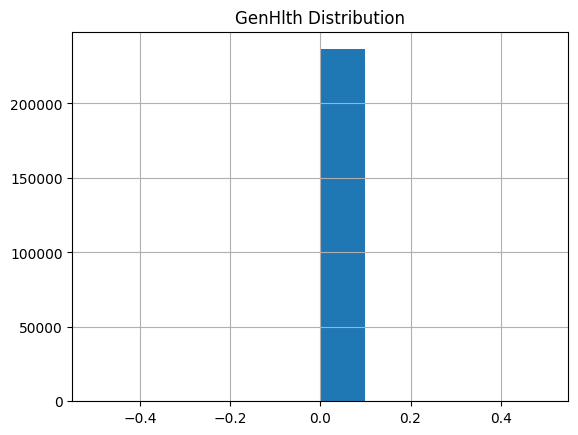

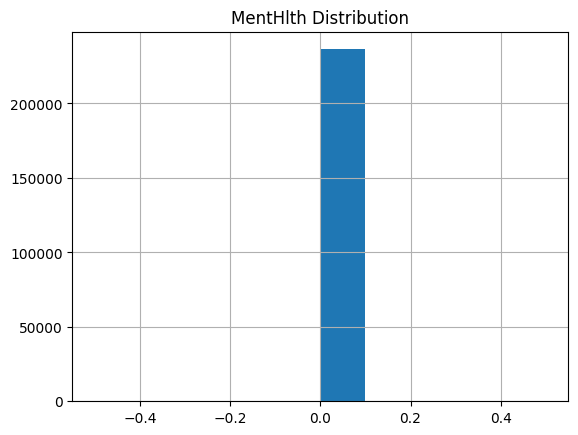

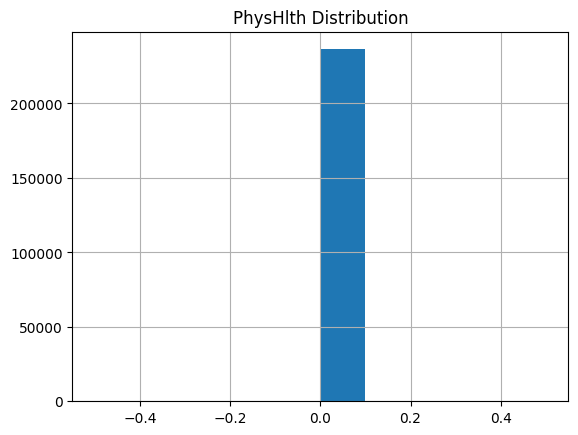

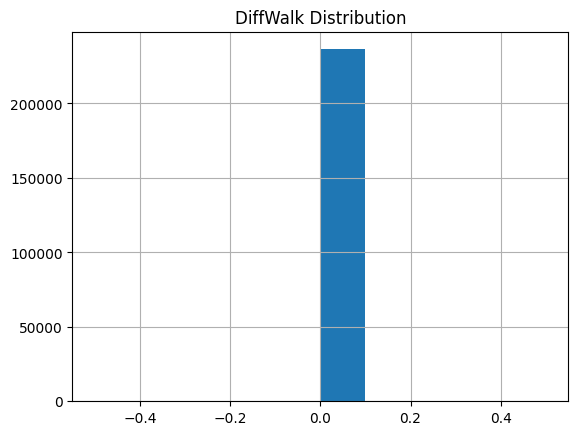

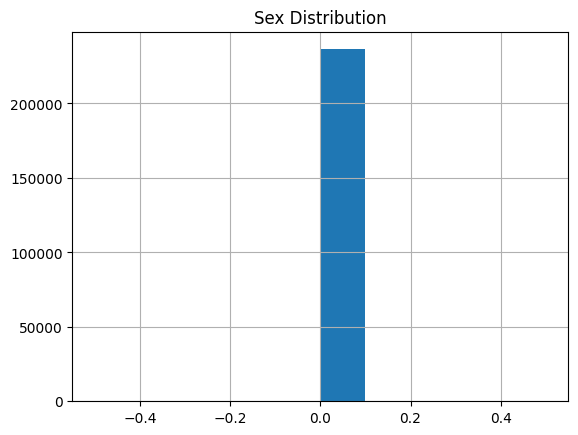

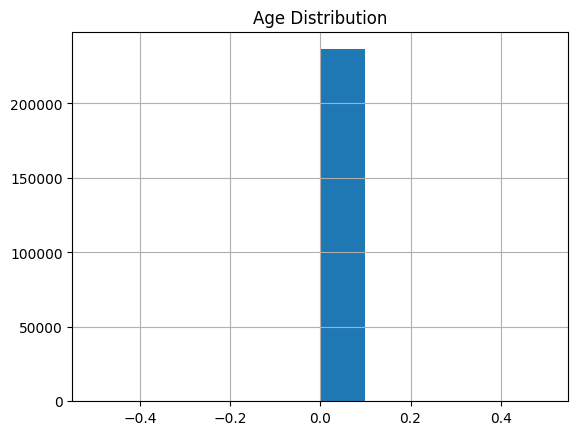

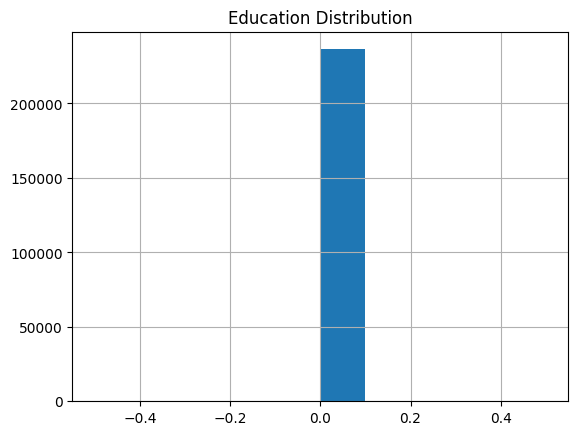

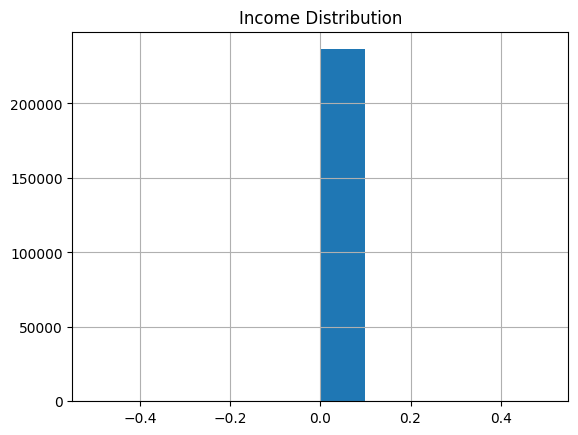

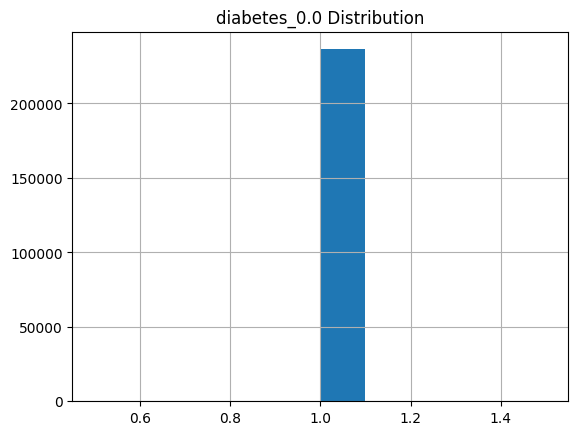

In [ ]:
#Visualization
for col in data.columns:
      if data[col].dtype == object:  # Categorical
          data[col].value_counts().plot(kind="bar")
          plt.title(col + " Distribution")
          plt.show()
      else:  # Numerical
          data[col].hist()
          plt.title(col + " Distribution")
          plt.show()


In [75]:
# Train-Test Split:


# Separate features (X) and target variable (y)
X = data.drop("Diabetes_012", axis=1)
y = data["Diabetes_012"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train LR and RF models
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=10)
